<a href="https://colab.research.google.com/github/Christymacarena/tableau/blob/main/Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode

In [4]:
data = [
    {"ID": 1, "Name": "Lionel Messi", "Sex": "M", "Age": 34, "Height": 170, "Weight": 72, "Team": "Paris Saint-Germain (PSG)", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Rosario", "Sport": "Football", "Medal": "NA"},
    {"ID": 2, "Name": "Diego Maradona", "Sex": "M", "Age": None, "Height": 165, "Weight": 75, "Team": "Various", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Football", "Medal": "NA"},
    {"ID": 3, "Name": "Gabriela Sabatini", "Sex": "F", "Age": 51, "Height": 175, "Weight": None, "Team": "Argentina", "NOC": "ARG", "Games": "1992 Summer", "Year": 1992, "Season": "Summer", "City": "Buenos Aires", "Sport": "Tennis", "Medal": "Silver"},
    {"ID": 4, "Name": "Manu Ginóbili", "Sex": "M", "Age": 44, "Height": 198, "Weight": 93, "Team": "Retired (formerly San Antonio Spurs)", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Bahía Blanca", "Sport": "Basketball", "Medal": "NA"},
    {"ID": 5, "Name": "Juan Martín del Potro", "Sex": "M", "Age": 33, "Height": 198, "Weight": 97, "Team": "Argentina", "NOC": "ARG", "Games": "2016 Summer", "Year": 2016, "Season": "Summer", "City": "Tandil", "Sport": "Tennis", "Medal": "NA"},
    {"ID": 6, "Name": "Luciana Aymar", "Sex": "F", "Age": 44, "Height": 166, "Weight": 60, "Team": "Argentina women's field hockey team", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Rosario", "Sport": "Hockey", "Medal": "NA"},
    {"ID": 7, "Name": "Carlos Tévez", "Sex": "M", "Age": 38, "Height": 173, "Weight": 70, "Team": "Retired (formerly Boca Juniors)", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Football", "Medal": "NA"},
    {"ID": 8, "Name": "Emanuel Ginóbili", "Sex": "M", "Age": 45, "Height": 198, "Weight": 93, "Team": "Retired (formerly San Antonio Spurs)", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Bahía Blanca", "Sport": "Basketball", "Medal": "NA"},
    {"ID": 9, "Name": "Sergio Agüero", "Sex": "M", "Age": 33, "Height": 173, "Weight": 70, "Team": "FC Barcelona", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Football", "Medal": "NA"},
    {"ID": 10, "Name": "Juan Román Riquelme", "Sex": "M", "Age": 43, "Height": 185, "Weight": 77, "Team": "Retired (formerly Boca Juniors)", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Football", "Medal": "NA"},
    {"ID": 11, "Name": "Sofía Goggia", "Sex": "F", "Age": 29, "Height": 170, "Weight": 70, "Team": "Italy", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Skiing", "Medal": "NA"},
    {"ID": 12, "Name": "Luis Scola", "Sex": "M", "Age": 41, "Height": 206, "Weight": 111, "Team": "Retired (formerly NBA)", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Bahía Blanca", "Sport": "Basketball", "Medal": "NA"},
    {"ID": 13, "Name": "Paula Pareto", "Sex": "F", "Age": 35, "Height": 155, "Weight": 48, "Team": "Argentina", "NOC": "ARG", "Games": "2016 Summer", "Year": 2016, "Season": "Summer", "City": "Buenos Aires", "Sport": "Judo", "Medal": "Gold"},
    {"ID": 14, "Name": "Fernando Gago", "Sex": "M", "Age": 35, "Height": 178, "Weight": 76, "Team": "Retired (formerly Boca Juniors)", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Football", "Medal": "NA"},
    {"ID": 15, "Name": "Agustín Pichot", "Sex": "M", "Age": 47, "Height": 180, "Weight": 85, "Team": "Retired", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Rugby", "Medal": "NA"},
    {"ID": 16, "Name": "Paola Suárez", "Sex": "F", "Age": 46, "Height": 163, "Weight": 55, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Tennis", "Medal": "NA"},
    {"ID": 17, "Name": "Juan Pablo Sorín", "Sex": "M", "Age": 46, "Height": 180, "Weight": 75, "Team": "Retired", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Football", "Medal": "NA"},
    {"ID": 18, "Name": "Cecilia Carranza", "Sex": "F", "Age": 35, "Height": 172, "Weight": 68, "Team": "Argentina", "NOC": "ARG", "Games": "2016 Summer", "Year": 2016, "Season": "Summer", "City": "Buenos Aires", "Sport": "Sailing", "Medal": "Gold"},
    {"ID": 19, "Name": "Mariano Puerta", "Sex": "M", "Age": 43, "Height": 180, "Weight": 75, "Team": "Retired", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Bahía Blanca", "Sport": "Tennis", "Medal": "NA"},
    {"ID": 20, "Name": "Carlos Delfino", "Sex": "M", "Age": 39, "Height": 198, "Weight": 102, "Team": "Retired (formerly NBA)", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Santa Fe", "Sport": "Basketball", "Medal": "NA"},
    {"ID": 21, "Name": "Pilar Geijo", "Sex": "F", "Age": 46, "Height": 175, "Weight": 58, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Swimming", "Medal": "NA"},
    {"ID": 22, "Name": "Santiago Lange", "Sex": "M", "Age": 60, "Height": 175, "Weight": 70, "Team": "Argentina", "NOC": "ARG", "Games": "2016 Summer", "Year": 2016, "Season": "Summer", "City": "Buenos Aires", "Sport": "Sailing", "Medal": "Gold"},
    {"ID": 23, "Name": "Nicolás Massú", "Sex": "M", "Age": 42, "Height": 183, "Weight": 82, "Team": "Retired", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Tennis", "Medal": "NA"},
    {"ID": 24, "Name": "Roberto Ayala", "Sex": "M", "Age": 48, "Height": 182, "Weight": 76, "Team": "Retired", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Paraná", "Sport": "Football", "Medal": "NA"},
    {"ID": 25, "Name": "Daniela Iraschko-Stolz", "Sex": "F", "Age": 37, "Height": 160, "Weight": 54, "Team": "Austria", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Esquel", "Sport": "Ski Jumping", "Medal": "NA"},
    {"ID": 26, "Name": "Javier Saviola", "Sex": "M", "Age": 40, "Height": 168, "Weight": 69, "Team": "Retired", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Football", "Medal": "NA"},
    {"ID": 27, "Name": "María Pía Herrera", "Sex": "F", "Age": 29, "Height": 180, "Weight": 65, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Basketball", "Medal": "NA"},
    {"ID": 28, "Name": "Andrés Nocioni", "Sex": "M", "Age": 42, "Height": 201, "Weight": 102, "Team": "Retired (formerly NBA)", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Santa Fe", "Sport": "Basketball", "Medal": "NA"},
    {"ID": 29, "Name": "Fernando Cáceres", "Sex": "M", "Age": 53, "Height": 185, "Weight": 78, "Team": "Retired", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Corrientes", "Sport": "Football", "Medal": "NA"},
    {"ID": 30, "Name": "Germán Lauro", "Sex": "M", "Age": 34, "Height": 198, "Weight": 125, "Team": "Argentina (athletics)", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Athletics", "Medal": "NA"},
    {"ID": 31, "Name": "Nancy Drozdowicz", "Sex": "F", "Age": 48, "Height": 163, "Weight": 57, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Basketball", "Medal": "NA"},
    {"ID": 32, "Name": "Alejandro Sabella", "Sex": "M", "Age": 67, "Height": 180, "Weight": 75, "Team": "Retired", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Football", "Medal": "NA"},
    {"ID": 33, "Name": "Andrea Berrino", "Sex": "F", "Age": 32, "Height": 167, "Weight": 58, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Swimming", "Medal": "NA"},
    {"ID": 34, "Name": "Carlos Berlocq", "Sex": "M", "Age": 38, "Height": 183, "Weight": 75, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Tennis", "Medal": "NA"},
    {"ID": 35, "Name": "Carlos Retegui", "Sex": "M", "Age": 53, "Height": 180, "Weight": 74, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Hockey", "Medal": "NA"},
    {"ID": 36, "Name": "Carlos Trullet", "Sex": "M", "Age": 66, "Height": 178, "Weight": 77, "Team": "Retired", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Rosario", "Sport": "Football", "Medal": "NA"},
    {"ID": 37, "Name": "Cristian Ledesma", "Sex": "M", "Age": 38, "Height": 180, "Weight": 72, "Team": "Retired (formerly Lazio)", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Football", "Medal": "NA"},
    {"ID": 38, "Name": "Daniel Orsanic", "Sex": "M", "Age": 52, "Height": 183, "Weight": 78, "Team": "Retired", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Tennis", "Medal": "NA"},
    {"ID": 39, "Name": "Daniela Urzi", "Sex": "F", "Age": 45, "Height": 180, "Weight": 58, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Basketball", "Medal": "NA"},
    {"ID": 40, "Name": "Diego Schwartzman", "Sex": "M", "Age": 29, "Height": 170, "Weight": 69, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Tennis", "Medal": "NA"},
    {"ID": 41, "Name": "Edgardo Bauza", "Sex": "M", "Age": 63, "Height": 178, "Weight": 74, "Team": "Retired", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Granadero Baigorria", "Sport": "Football", "Medal": "NA"},
    {"ID": 42, "Name": "Emanuel Rego", "Sex": "M", "Age": 48, "Height": 183, "Weight": 78, "Team": "Brazil", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Córdoba", "Sport": "Beach Volleyball", "Medal": "NA"},
    {"ID": 43, "Name": "Emilio Gutiérrez", "Sex": "M", "Age": 46, "Height": 178, "Weight": 70, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Boxing", "Medal": "NA"},
    {"ID": 44, "Name": "Emilio Rodríguez", "Sex": "M", "Age": 40, "Height": 180, "Weight": 73, "Team": "Retired", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Rosario", "Sport": "Football", "Medal": "NA"},
    {"ID": 45, "Name": "Emiliano Insúa", "Sex": "M", "Age": 33, "Height": 180, "Weight": 75, "Team": "Rayo Vallecano", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Football", "Medal": "NA"},
    {"ID": 46, "Name": "Ernesto Vecchio", "Sex": "M", "Age": 46, "Height": 178, "Weight": 72, "Team": "Retired", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Rosario", "Sport": "Football", "Medal": "NA"},
    {"ID": 47, "Name": "Esteban Cambiasso", "Sex": "M", "Age": 41, "Height": 178, "Weight": 70, "Team": "Retired (formerly Inter Milan)", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Football", "Medal": "NA"},
    {"ID": 48, "Name": "Esteban Batista", "Sex": "M", "Age": 39, "Height": 208, "Weight": 120, "Team": "Retired (formerly Uruguay basketball)", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Maldonado", "Sport": "Basketball", "Medal": "NA"},
    {"ID": 49, "Name": "Estela de la Torre", "Sex": "F", "Age": 30, "Height": 177, "Weight": 63, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Swimming", "Medal": "NA"},
    {"ID": 50, "Name": "Facundo Campazzo", "Sex": "M", "Age": 30, "Height": 180, "Weight": 86, "Team": "Denver Nuggets", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Córdoba", "Sport": "Basketball", "Medal": "NA"},
    {"ID": 1, "Name": "Lionel Messi", "Sex": "M", "Age": 34, "Height": 170, "Weight": 72, "Team": "Paris Saint-Germain (PSG)", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Rosario", "Sport": "Football", "Medal": "NA"},
    {"ID": 2, "Name": "Diego Maradona", "Sex": "M", "Age": None, "Height": 165, "Weight": 75, "Team": "Various", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Football", "Medal": "NA"},
    {"ID": 3, "Name": "Gabriela Sabatini", "Sex": "F", "Age": 51, "Height": 175, "Weight": None, "Team": "Argentina", "NOC": "ARG", "Games": "1992 Summer", "Year": 1992, "Season": "Summer", "City": "Buenos Aires", "Sport": "Tennis", "Medal": "Silver"},
    {"ID": 4, "Name": "Manu Ginóbili", "Sex": "M", "Age": 44, "Height": 198, "Weight": 93, "Team": "Retired (formerly San Antonio Spurs)", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Bahía Blanca", "Sport": "Basketball", "Medal": "NA"},
    {"ID": 5, "Name": "Juan Martín del Potro", "Sex": "M", "Age": 33, "Height": 198, "Weight": 97, "Team": "Argentina", "NOC": "ARG", "Games": "2016 Summer", "Year": 2016, "Season": "Summer", "City": "Tandil", "Sport": "Tennis", "Medal": "NA"},
    {"ID": 6, "Name": "Luciana Aymar", "Sex": "F", "Age": 44, "Height": 166, "Weight": 60, "Team": "Argentina women's field hockey team", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Rosario", "Sport": "Hockey", "Medal": "NA"},
    {"ID": 7, "Name": "Carlos Tévez", "Sex": "M", "Age": 38, "Height": 173, "Weight": 70, "Team": "Retired (formerly Boca Juniors)", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Football", "Medal": "NA"},
    {"ID": 8, "Name": "Emanuel Ginóbili", "Sex": "M", "Age": 45, "Height": 198, "Weight": 93, "Team": "Retired (formerly San Antonio Spurs)", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Bahía Blanca", "Sport": "Basketball", "Medal": "NA"},
    {"ID": 9, "Name": "Sergio Agüero", "Sex": "M", "Age": 34, "Height": 173, "Weight": 70, "Team": "FC Barcelona", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Football", "Medal": "NA"},
    {"ID": 10, "Name": "Juan Román Riquelme", "Sex": "M", "Age": 43, "Height": 185, "Weight": 85, "Team": "Retired (formerly Boca Juniors)", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Football", "Medal": "NA"},
    {"ID": 11, "Name": "Sofía Goggia", "Sex": "F", "Age": 29, "Height": 171, "Weight": 65, "Team": "Italy", "NOC": "ITA", "Games": "NA", "Year": None, "Season": "NA", "City": "Milan", "Sport": "Alpine Skiing", "Medal": "Gold"},
    {"ID": 12, "Name": "Luis Scola", "Sex": "M", "Age": 41, "Height": 206, "Weight": 107, "Team": "Retired (formerly Shanghai Sharks)", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Basketball", "Medal": "NA"},
    {"ID": 13, "Name": "Paula Pareto", "Sex": "F", "Age": 36, "Height": 151, "Weight": 48, "Team": "Argentina (judo)", "NOC": "ARG", "Games": "2016 Summer", "Year": 2016, "Season": "Summer", "City": "Buenos Aires", "Sport": "Judo", "Medal": "Gold"},
    {"ID": 14, "Name": "Fernando Gago", "Sex": "M", "Age": 35, "Height": 174, "Weight": 72, "Team": "Retired (formerly Boca Juniors)", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Ciudadela", "Sport": "Football", "Medal": "NA"},
    {"ID": 15, "Name": "Agustín Pichot", "Sex": "M", "Age": 47, "Height": 175, "Weight": 85, "Team": "Retired", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Rugby", "Medal": "NA"},
    {"ID": 16, "Name": "Paola Suárez", "Sex": "F", "Age": 46, "Height": 163, "Weight": 55, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Tennis", "Medal": "NA"},
    {"ID": 17, "Name": "Juan Pablo Sorín", "Sex": "M", "Age": 46, "Height": 180, "Weight": 75, "Team": "Retired", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Football", "Medal": "NA"},
    {"ID": 18, "Name": "Cecilia Carranza", "Sex": "F", "Age": 35, "Height": 172, "Weight": 68, "Team": "Argentina", "NOC": "ARG", "Games": "2016 Summer", "Year": 2016, "Season": "Summer", "City": "Buenos Aires", "Sport": "Sailing", "Medal": "Gold"},
    {"ID": 19, "Name": "Mariano Puerta", "Sex": "M", "Age": 43, "Height": 180, "Weight": 75, "Team": "Retired", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Bahía Blanca", "Sport": "Tennis", "Medal": "NA"},
    {"ID": 20, "Name": "Carlos Delfino", "Sex": "M", "Age": 39, "Height": 198, "Weight": 102, "Team": "Retired (formerly NBA)", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Santa Fe", "Sport": "Basketball", "Medal": "NA"},
    {"ID": 21, "Name": "Pilar Geijo", "Sex": "F", "Age": 46, "Height": 175, "Weight": 58, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Swimming", "Medal": "NA"},
    {"ID": 22, "Name": "Santiago Lange", "Sex": "M", "Age": 60, "Height": 175, "Weight": 70, "Team": "Argentina", "NOC": "ARG", "Games": "2016 Summer", "Year": 2016, "Season": "Summer", "City": "Buenos Aires", "Sport": "Sailing", "Medal": "Gold"},
    {"ID": 23, "Name": "Nicolás Massú", "Sex": "M", "Age": 42, "Height": 183, "Weight": 82, "Team": "Retired", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Tennis", "Medal": "NA"},
    {"ID": 24, "Name": "Roberto Ayala", "Sex": "M", "Age": 48, "Height": 182, "Weight": 76, "Team": "Retired", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Paraná", "Sport": "Football", "Medal": "NA"},
    {"ID": 25, "Name": "Daniela Iraschko-Stolz", "Sex": "F", "Age": 38, "Height": 161, "Weight": 55, "Team": "Austria", "NOC": "AUT", "Games": "NA", "Year": None, "Season": "NA", "City": "Judenburg", "Sport": "Ski Jumping", "Medal": "Silver"},
    {"ID": 26, "Name": "Germán Lauro", "Sex": "M", "Age": 34, "Height": 198, "Weight": 125, "Team": "Argentina (athletics)", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Athletics", "Medal": "NA"},
    {"ID": 27, "Name": "Josefina Sruoga", "Sex": "F", "Age": 32, "Height": 167, "Weight": 58, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Swimming", "Medal": "NA"},
    {"ID": 28, "Name": "Fabián Gómez", "Sex": "M", "Age": 43, "Height": 180, "Weight": 84, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Chaco", "Sport": "Golf", "Medal": "NA"},
    {"ID": 29, "Name": "Lucas Matthysse", "Sex": "M", "Age": 39, "Height": 175, "Weight": 66, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Trelew", "Sport": "Boxing", "Medal": "NA"},
    {"ID": 30, "Name": "Florencia Habif", "Sex": "F", "Age": 29, "Height": 175, "Weight": 65, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Hockey", "Medal": "NA"},
    {"ID": 31, "Name": "Matías Rossi", "Sex": "M", "Age": 41, "Height": 170, "Weight": 72, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Del Viso", "Sport": "Motorsport", "Medal": "NA"},
    {"ID": 32, "Name": "María de la Paz Paz", "Sex": "F", "Age": 24, "Height": 165, "Weight": 61, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "La Paz", "Sport": "Boxing", "Medal": "NA"},
    {"ID": 33, "Name": "Gisela Dulko", "Sex": "F", "Age": 37, "Height": 177, "Weight": 59, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Tennis", "Medal": "NA"},
    {"ID": 34, "Name": "Gonzalo Tellechea", "Sex": "M", "Age": 36, "Height": 193, "Weight": 95, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Rowing", "Medal": "NA"},
    {"ID": 35, "Name": "Geraldine Soledad", "Sex": "F", "Age": 24, "Height": 166, "Weight": 56, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Rowing", "Medal": "NA"},
    {"ID": 36, "Name": "Fernando Zylberberg", "Sex": "M", "Age": 43, "Height": 180, "Weight": 76, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Rowing", "Medal": "NA"},
    {"ID": 37, "Name": "Walter Pérez", "Sex": "M", "Age": 45, "Height": 177, "Weight": 78, "Team": "Argentina", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Cycling", "Medal": "NA"},
    {"ID": 38, "Name": "Carlos Espínola", "Sex": "M", "Age": 53, "Height": 180, "Weight": 78, "Team": "Retired", "NOC": "ARG", "Games": "NA", "Year": None, "Season": "NA", "City": "Buenos Aires", "Sport": "Sailing", "Medal": "NA"}
    ]

In [5]:
df = pd.DataFrame(data)

In [6]:
df.drop_duplicates(subset="Name", keep="first", inplace=True)

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      62 non-null     int64  
 1   Name    62 non-null     object 
 2   Sex     62 non-null     object 
 3   Age     61 non-null     float64
 4   Height  62 non-null     int64  
 5   Weight  61 non-null     float64
 6   Team    62 non-null     object 
 7   NOC     62 non-null     object 
 8   Games   62 non-null     object 
 9   Year    5 non-null      float64
 10  Season  62 non-null     object 
 11  City    62 non-null     object 
 12  Sport   62 non-null     object 
 13  Medal   62 non-null     object 
dtypes: float64(3), int64(2), object(9)
memory usage: 6.9+ KB


In [9]:
df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Medal
49,50,Facundo Campazzo,M,30.0,180,86.0,Denver Nuggets,ARG,NA,NaN,NA,Córdoba,Basketball,NA
38,39,Daniela Urzi,F,45.0,180,58.0,Argentina,ARG,NA,NaN,NA,Buenos Aires,Basketball,NA
7,8,Emanuel Ginóbili,M,45.0,198,93.0,Retired (formerly San Antonio Spurs),ARG,NA,NaN,NA,Bahía Blanca,Basketball,NA
29,30,Germán Lauro,M,34.0,198,125.0,Argentina (athletics),ARG,NA,NaN,NA,Buenos Aires,Athletics,NA
25,26,Javier Saviola,M,40.0,168,69.0,Retired,ARG,NA,NaN,NA,Buenos Aires,Football,NA


In [10]:
df.drop(columns=["ID"], inplace=True)

In [11]:
df

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Medal
0,Lionel Messi,M,34.0,170,72.0,Paris Saint-Germain (PSG),ARG,NA,NaN,NA,Rosario,Football,NA
1,Diego Maradona,M,NaN,165,75.0,Various,ARG,NA,NaN,NA,Buenos Aires,Football,NA
2,Gabriela Sabatini,F,51.0,175,NaN,Argentina,ARG,1992 Summer,1992.0,Summer,Buenos Aires,Tennis,Silver
3,Manu Ginóbili,M,44.0,198,93.0,Retired (formerly San Antonio Spurs),ARG,NA,NaN,NA,Bahía Blanca,Basketball,NA
4,Juan Martín del Potro,M,33.0,198,97.0,Argentina,ARG,2016 Summer,2016.0,Summer,Tandil,Tennis,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Gonzalo Tellechea,M,36.0,193,95.0,Argentina,ARG,NA,NaN,NA,Buenos Aires,Rowing,NA
58,Geraldine Soledad,F,24.0,166,56.0,Argentina,ARG,NA,NaN,NA,Buenos Aires,Rowing,NA
59,Fernando Zylberberg,M,43.0,180,76.0,Argentina,ARG,NA,NaN,NA,Buenos Aires,Rowing,NA
60,Walter Pérez,M,45.0,177,78.0,Argentina,ARG,NA,NaN,NA,Buenos Aires,Cycling,NA


In [12]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [13]:
olympic_arg= df[df['Year'].notnull()]

In [14]:
olympic_arg

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Medal
2,Gabriela Sabatini,F,51.0,175,NaN,Argentina,ARG,1992 Summer,1992-01-01,Summer,Buenos Aires,Tennis,Silver
4,Juan Martín del Potro,M,33.0,198,97.0,Argentina,ARG,2016 Summer,2016-01-01,Summer,Tandil,Tennis,NA
12,Paula Pareto,F,35.0,155,48.0,Argentina,ARG,2016 Summer,2016-01-01,Summer,Buenos Aires,Judo,Gold
17,Cecilia Carranza,F,35.0,172,68.0,Argentina,ARG,2016 Summer,2016-01-01,Summer,Buenos Aires,Sailing,Gold
21,Santiago Lange,M,60.0,175,70.0,Argentina,ARG,2016 Summer,2016-01-01,Summer,Buenos Aires,Sailing,Gold


In [15]:
df.loc[df['Name'] == 'Gabriela Sabatini', 'Weight'] = 66

In [16]:
olympic_arg.loc[olympic_arg['Name'] == 'Gabriela Sabatini', 'Weight'] = 66

In [17]:
olympic_arg

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Medal
2,Gabriela Sabatini,F,51.0,175,66.0,Argentina,ARG,1992 Summer,1992-01-01,Summer,Buenos Aires,Tennis,Silver
4,Juan Martín del Potro,M,33.0,198,97.0,Argentina,ARG,2016 Summer,2016-01-01,Summer,Tandil,Tennis,NA
12,Paula Pareto,F,35.0,155,48.0,Argentina,ARG,2016 Summer,2016-01-01,Summer,Buenos Aires,Judo,Gold
17,Cecilia Carranza,F,35.0,172,68.0,Argentina,ARG,2016 Summer,2016-01-01,Summer,Buenos Aires,Sailing,Gold
21,Santiago Lange,M,60.0,175,70.0,Argentina,ARG,2016 Summer,2016-01-01,Summer,Buenos Aires,Sailing,Gold


In [18]:
df.columns

Index(['Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Medal'],
      dtype='object')

In [19]:
df.drop(columns=['NOC', 'Games', 'Year', 'Season', 'Medal'], inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    62 non-null     object 
 1   Sex     62 non-null     object 
 2   Age     61 non-null     float64
 3   Height  62 non-null     int64  
 4   Weight  62 non-null     float64
 5   Team    62 non-null     object 
 6   City    62 non-null     object 
 7   Sport   62 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.0+ KB


In [21]:
df.drop(df[df['Age'].isnull()].index, inplace=True)

In [23]:
df['Age'].values

array([34., 51., 44., 33., 44., 38., 45., 33., 43., 29., 41., 35., 35.,
       47., 46., 46., 35., 43., 39., 46., 60., 42., 48., 37., 40., 29.,
       42., 53., 34., 48., 67., 32., 38., 53., 66., 38., 52., 45., 29.,
       63., 48., 46., 40., 33., 46., 41., 39., 30., 30., 32., 43., 39.,
       29., 41., 24., 37., 36., 24., 43., 45., 53.])

<ipython-input-24-673314c49fd8>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




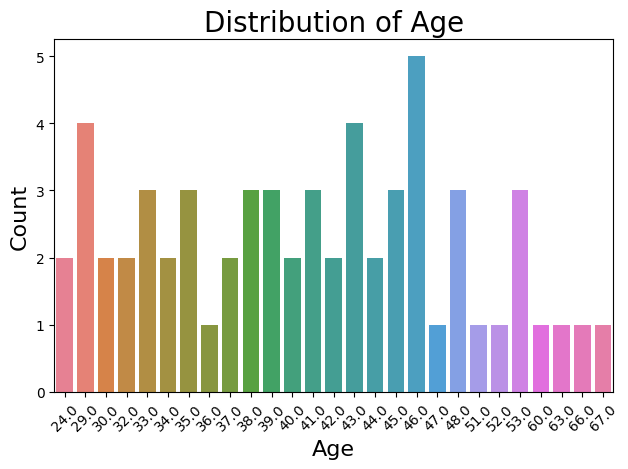

In [24]:
# Create the count plot with seaborn
sns.countplot(x='Age', data=df, palette='husl')  # You can change 'husl' to any other color palette

# Set title and labels
plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [61]:
men_df = actualathlets[df['Sex'] == 'M']
women_df = actualathlets[df['Sex'] == 'F']

# Calculate the average age for men and women
average_age_men = men_df['Age'].mean()
average_age_women = women_df['Age'].mean()

<ipython-input-61-d30f8bc7c69f>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-61-d30f8bc7c69f>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [60]:
print(average_age_men,average_age_women)

39.888888888888886 36.27777777777778


In [25]:
masterDisciplines = df['Sport'][df['Age'] > 50]

<ipython-input-26-5b910ad8f7a4>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




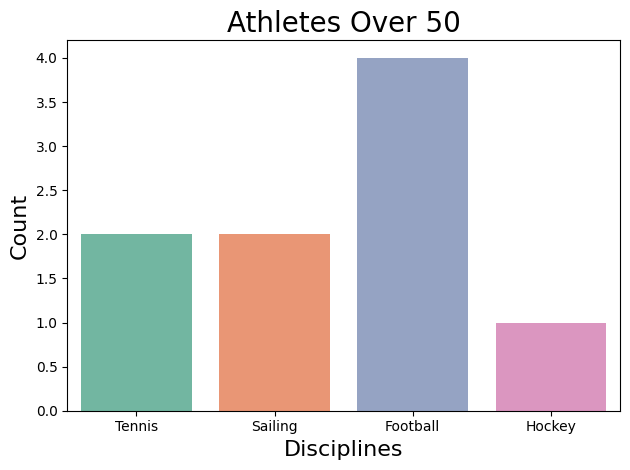

In [26]:
plt.figure

sns.countplot(x=masterDisciplines, palette='Set2')

plt.title('Athletes Over 50', fontsize=20)
plt.xlabel('Disciplines', fontsize=16)
plt.ylabel('Count', fontsize=16)

plt.xticks

plt.tight_layout()
plt.show()

In [28]:
retired_players = df[df['Team'].str.contains('retired', case=False)]

In [29]:
retired_players

,Name,Sex,Age,Height,Weight,Team,City,Sport
3,Manu Ginóbili,M,44.0,198,93.0,Retired (formerly San Antonio Spurs),Bahía Blanca,Basketball
6,Carlos Tévez,M,38.0,173,70.0,Retired (formerly Boca Juniors),Buenos Aires,Football
7,Emanuel Ginóbili,M,45.0,198,93.0,Retired (formerly San Antonio Spurs),Bahía Blanca,Basketball
9,Juan Román Riquelme,M,43.0,185,77.0,Retired (formerly Boca Juniors),Buenos Aires,Football
11,Luis Scola,M,41.0,206,111.0,Retired (formerly NBA),Bahía Blanca,Basketball
13,Fernando Gago,M,35.0,178,76.0,Retired (formerly Boca Juniors),Buenos Aires,Football
14,Agustín Pichot,M,47.0,180,85.0,Retired,Buenos Aires,Rugby
16,Juan Pablo Sorín,M,46.0,180,75.0,Retired,Buenos Aires,Football
18,Mariano Puerta,M,43.0,180,75.0,Retired,Bahía Blanca,Tennis
19,Carlos Delfino,M,39.0,198,102.0,Retired (formerly NBA),Santa Fe,Basketball


In [30]:
df['Actual Status'] = df['Team'].str.contains('Retired', case=False).astype(int)

In [52]:
df
#0 is when sportsmen is still in the game and 1 is for retires athlets

,Name,Sex,Age,Height,Weight,Team,City,Sport,Actual Status
0,Lionel Messi,M,34.0,170,72.0,Paris Saint-Germain (PSG),Rosario,Football,0
2,Gabriela Sabatini,F,51.0,175,66.0,Argentina,Buenos Aires,Tennis,0
3,Manu Ginóbili,M,44.0,198,93.0,Retired (formerly San Antonio Spurs),Bahía Blanca,Basketball,1
4,Juan Martín del Potro,M,33.0,198,97.0,Argentina,Tandil,Tennis,0
5,Luciana Aymar,F,44.0,166,60.0,Argentina women's field hockey team,Rosario,Hockey,0
...,...,...,...,...,...,...,...,...,...
57,Gonzalo Tellechea,M,36.0,193,95.0,Argentina,Buenos Aires,Rowing,0
58,Geraldine Soledad,F,24.0,166,56.0,Argentina,Buenos Aires,Rowing,0
59,Fernando Zylberberg,M,43.0,180,76.0,Argentina,Buenos Aires,Rowing,0
60,Walter Pérez,M,45.0,177,78.0,Argentina,Buenos Aires,Cycling,0


In [32]:
df[df['Actual Status'] == 0]

,Name,Sex,Age,Height,Weight,Team,City,Sport,Actual Status
0,Lionel Messi,M,34.0,170,72.0,Paris Saint-Germain (PSG),Rosario,Football,0
2,Gabriela Sabatini,F,51.0,175,66.0,Argentina,Buenos Aires,Tennis,0
4,Juan Martín del Potro,M,33.0,198,97.0,Argentina,Tandil,Tennis,0
5,Luciana Aymar,F,44.0,166,60.0,Argentina women's field hockey team,Rosario,Hockey,0
8,Sergio Agüero,M,33.0,173,70.0,FC Barcelona,Buenos Aires,Football,0
10,Sofía Goggia,F,29.0,170,70.0,Italy,Buenos Aires,Skiing,0
12,Paula Pareto,F,35.0,155,48.0,Argentina,Buenos Aires,Judo,0
15,Paola Suárez,F,46.0,163,55.0,Argentina,Buenos Aires,Tennis,0
17,Cecilia Carranza,F,35.0,172,68.0,Argentina,Buenos Aires,Sailing,0
20,Pilar Geijo,F,46.0,175,58.0,Argentina,Buenos Aires,Swimming,0


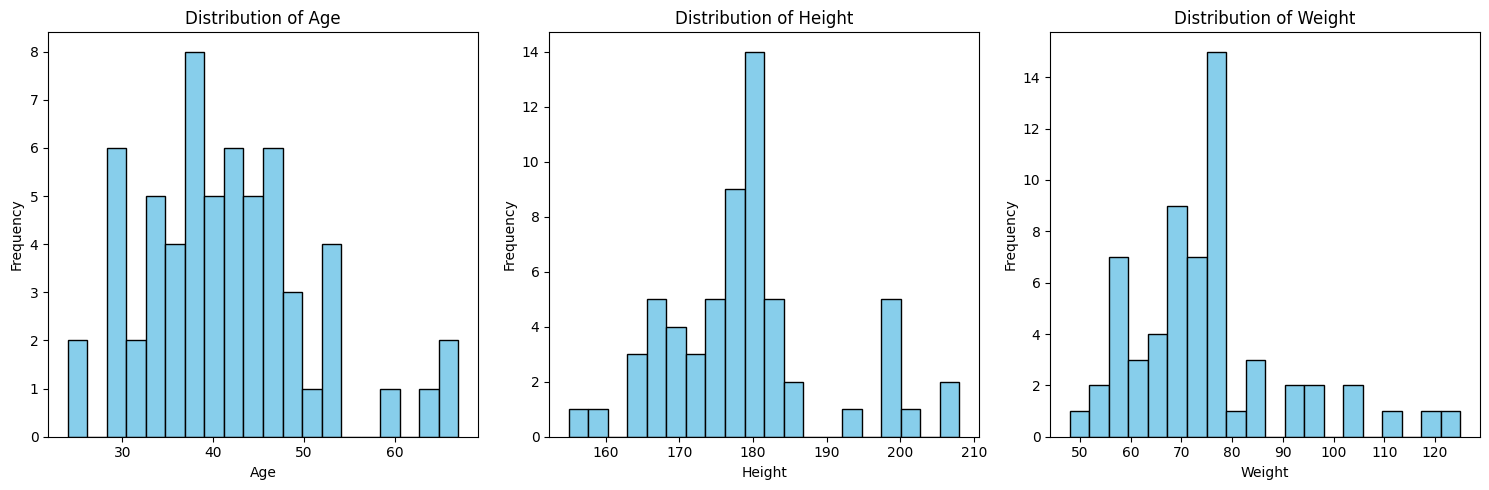

In [33]:
numerical_features = ['Age', 'Height', 'Weight']

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(15, 5))

for i, feature in enumerate(numerical_features):
    ax = axes[i]
    ax.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

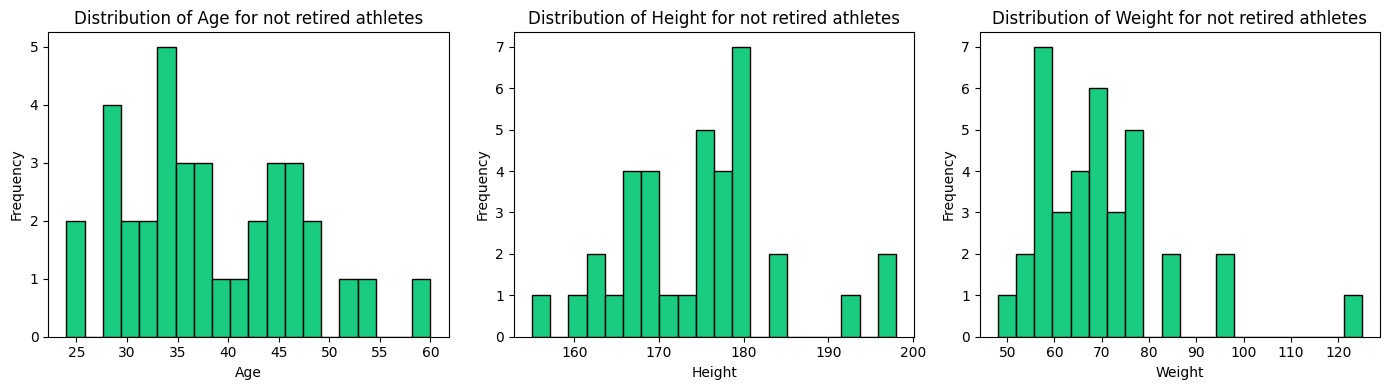

In [34]:
import matplotlib.pyplot as plt

actualathlets = df[df['Actual Status'] == 0]

numerical_features = ['Age', 'Height', 'Weight']

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(14, 4))

for i, feature in enumerate(numerical_features):
    ax = axes[i]
    ax.hist(actualathlets[feature], bins=20, color=(0.1, 0.8, 0.5), edgecolor='black')
    ax.set_title(f'Distribution of {feature} for not retired athletes')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [35]:
aged_sportsmen=df[(df['Actual Status'] == 0) & (df['Age'] > 50)]

In [36]:
aged_sportsmen

,Name,Sex,Age,Height,Weight,Team,City,Sport,Actual Status
2,Gabriela Sabatini,F,51.0,175,66.0,Argentina,Buenos Aires,Tennis,0
21,Santiago Lange,M,60.0,175,70.0,Argentina,Buenos Aires,Sailing,0
34,Carlos Retegui,M,53.0,180,74.0,Argentina,Buenos Aires,Hockey,0


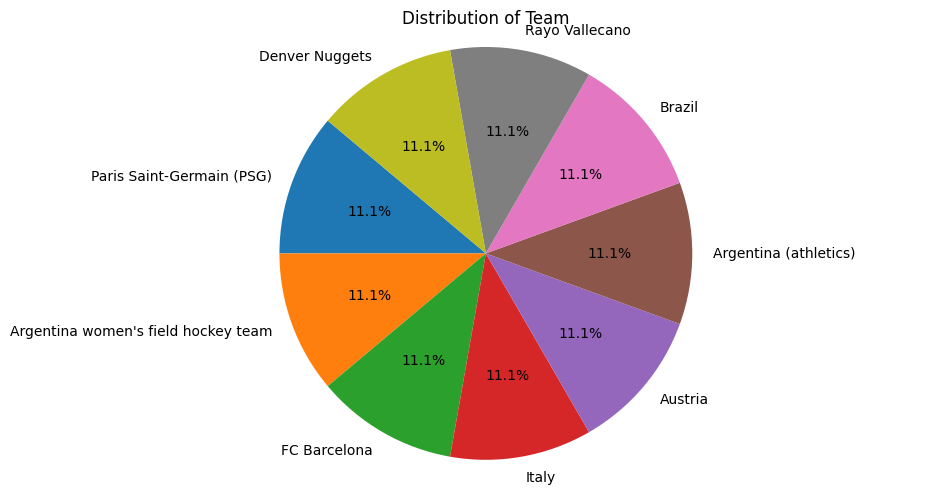

In [56]:
filtered_df = actualathlets[actualathlets['Team'] != 'Argentina']

category = ['Team']
value_counts = filtered_df[category[0]].value_counts()

fig, ax = plt.subplots(figsize=(10, 5))

colors = plt.cm.tab10(np.arange(len(value_counts)))

ax.pie(value_counts, labels=value_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
ax.set_title(f'Distribution of {category[0]}')

ax.axis('equal')

plt.tight_layout()
plt.show()

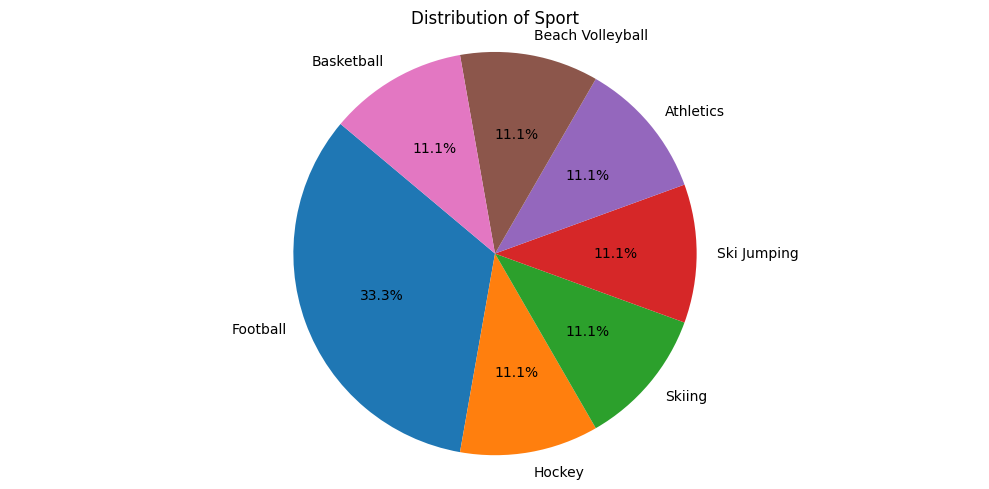

In [38]:
#filtered_df = actualathlets[actualathlets['Team'] != 'Argentina']

category = ['Sport']
value_counts = filtered_df[category[0]].value_counts()

fig, ax = plt.subplots(figsize=(10, 5))

colors = plt.cm.tab10(np.arange(len(value_counts)))

ax.pie(value_counts, labels=value_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
ax.set_title(f'Distribution of {category[0]}')

ax.axis('equal')

plt.tight_layout()
plt.show()

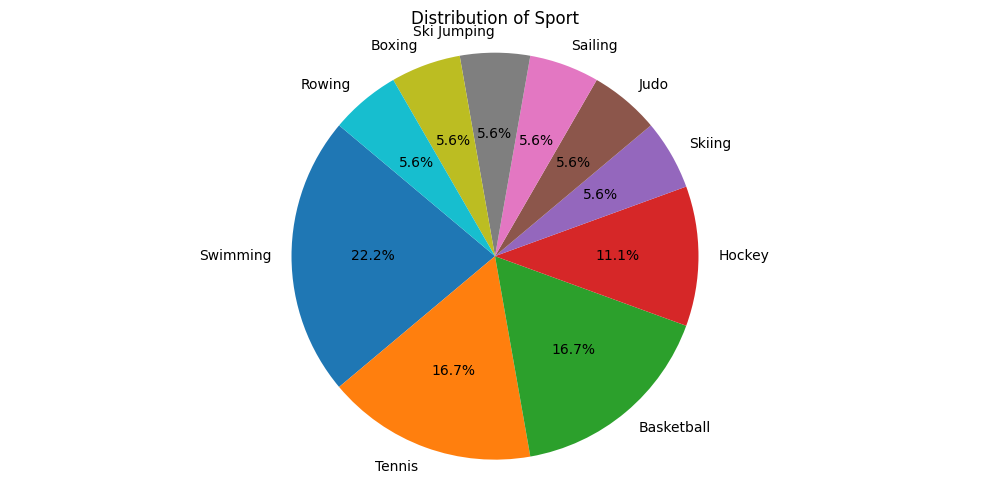

In [39]:
filtered_df = actualathlets[actualathlets['Sex'] == 'F']

category = ['Sport']
value_counts = filtered_df[category[0]].value_counts()

fig, ax = plt.subplots(figsize=(10, 5))

colors = plt.cm.tab10(np.arange(len(value_counts)))

ax.pie(value_counts, labels=value_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
ax.set_title(f'Distribution of {category[0]}')

ax.axis('equal')

plt.tight_layout()
plt.show()

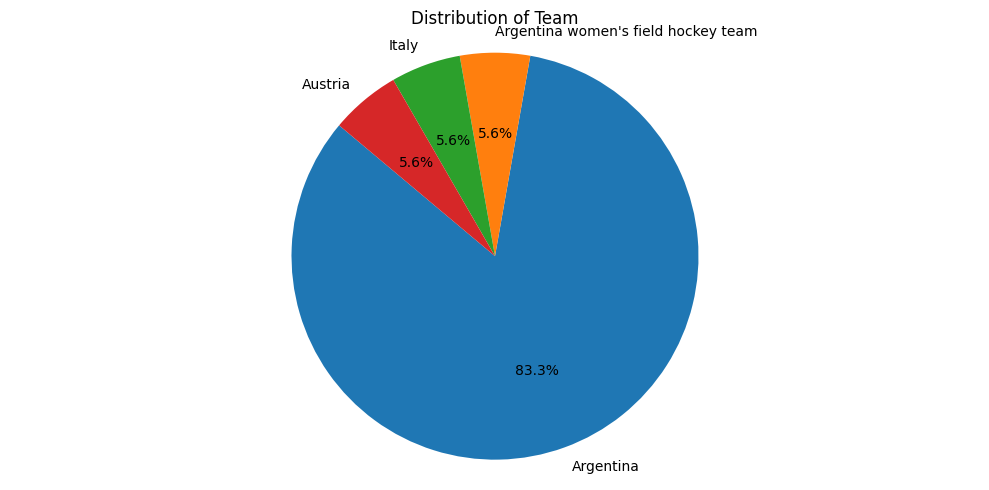

In [59]:
filtered_df = actualathlets[actualathlets['Sex'] == 'F']

category = ['Team']
value_counts = filtered_df[category[0]].value_counts()

fig, ax = plt.subplots(figsize=(10, 5))

colors = plt.cm.tab10(np.arange(len(value_counts)))

ax.pie(value_counts, labels=value_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
ax.set_title(f'Distribution of {category[0]}')

ax.axis('equal')

plt.tight_layout()
plt.show()

<ipython-input-58-66362c22de26>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-58-66362c22de26>:13: UserWarning:

The palette list has more values (3) than needed (1), which may not be intended.

<ipython-input-58-66362c22de26>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-58-66362c22de26>:13: UserWarning:

The palette list has more values (3) than needed (1), which may not be intended.

<ipython-input-58-66362c22de26>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-58-66362c22de26>:13: UserWarning:

The palette list has mo

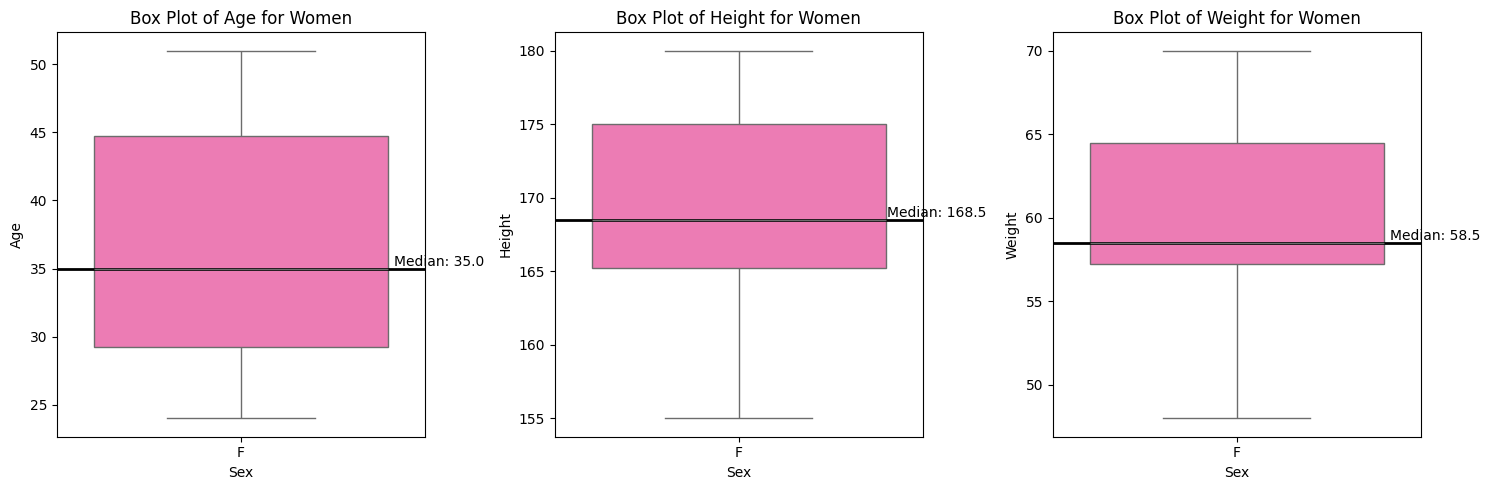

In [58]:
women = df[(df['Actual Status'] == 0) & (df['Sex'] == 'F')]

numerical_variables = ['Age', 'Height', 'Weight']

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_variables), figsize=(15, 5))

pink_palette = ['#FF69B4', '#FFC0CB', '#FF1493']

for i, var in enumerate(numerical_variables):
    sns.boxplot(x='Sex', y=var, data=women, ax=axes[i], palette=pink_palette)
    axes[i].set_title(f'Box Plot of {var} for Women')
    axes[i].set_ylabel(var)

    median_val = women[var].median()
    axes[i].axhline(median_val, color='black', linestyle='-', linewidth=2)

    axes[i].annotate(f'Median: {median_val}', xy=(0.5, median_val), xytext=(10, 0),
                     textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

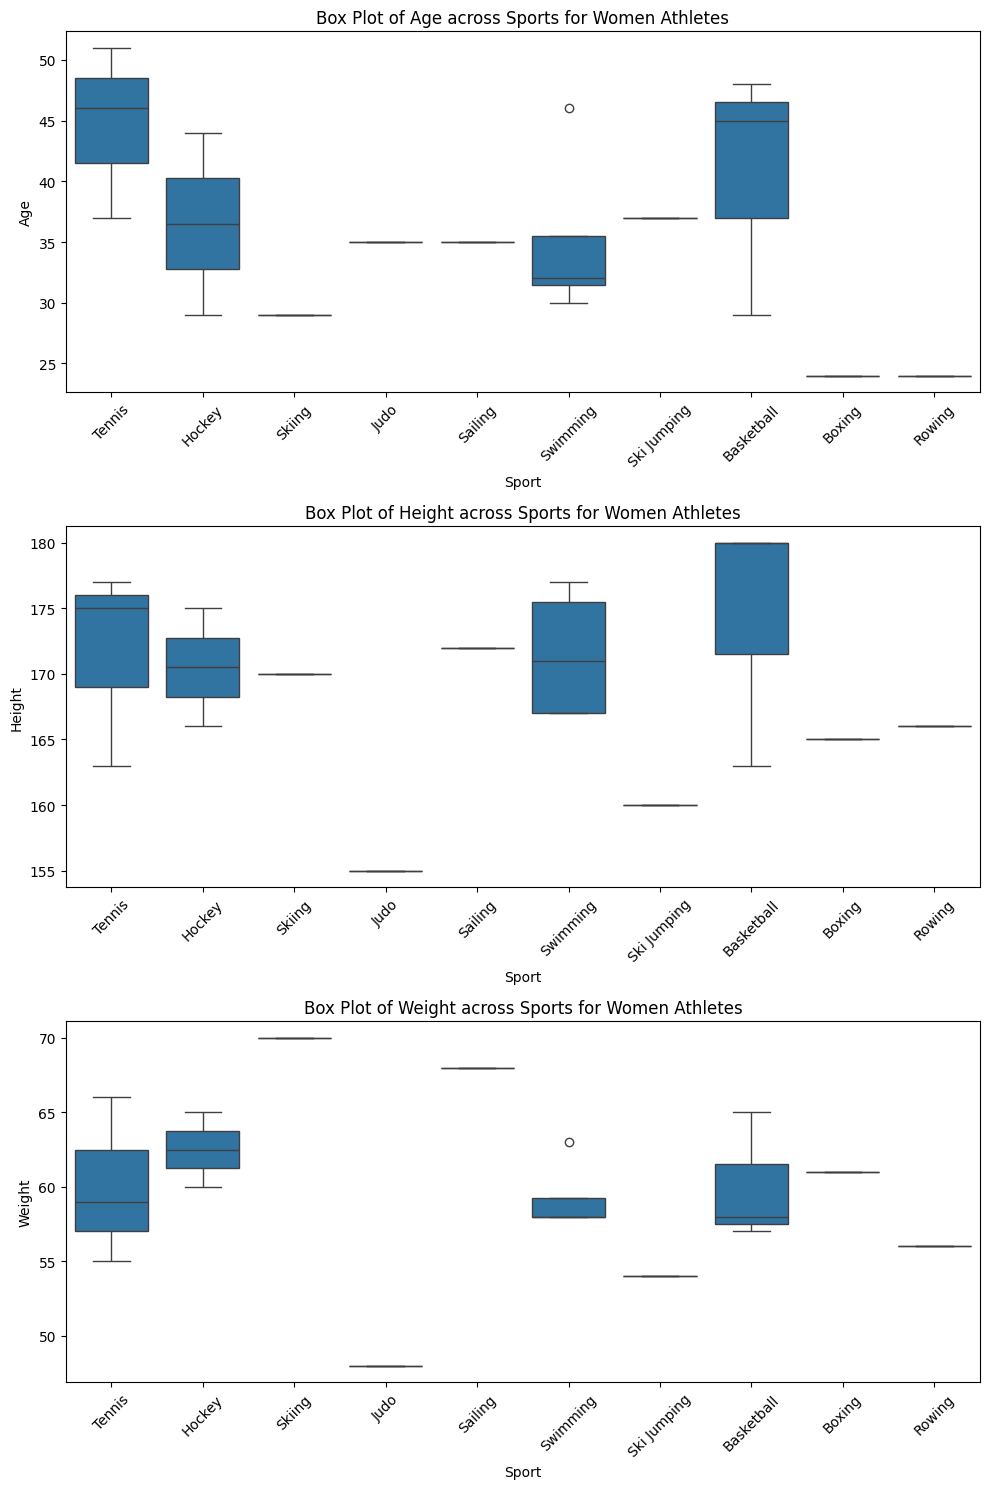

In [42]:
numerical_variables = ['Age', 'Height', 'Weight']

fig, axes = plt.subplots(nrows=len(numerical_variables), ncols=1, figsize=(10, 15))

for i, var in enumerate(numerical_variables):
    sns.boxplot(x='Sport', y=var, data=women, ax=axes[i])
    axes[i].set_title(f'Box Plot of {var} across Sports for Women Athletes')
    axes[i].set_ylabel(var)
    axes[i].set_xlabel('Sport')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()

plt.show()

In [43]:
city_sport_dummies = pd.get_dummies(actualathlets[['City', 'Sport']])

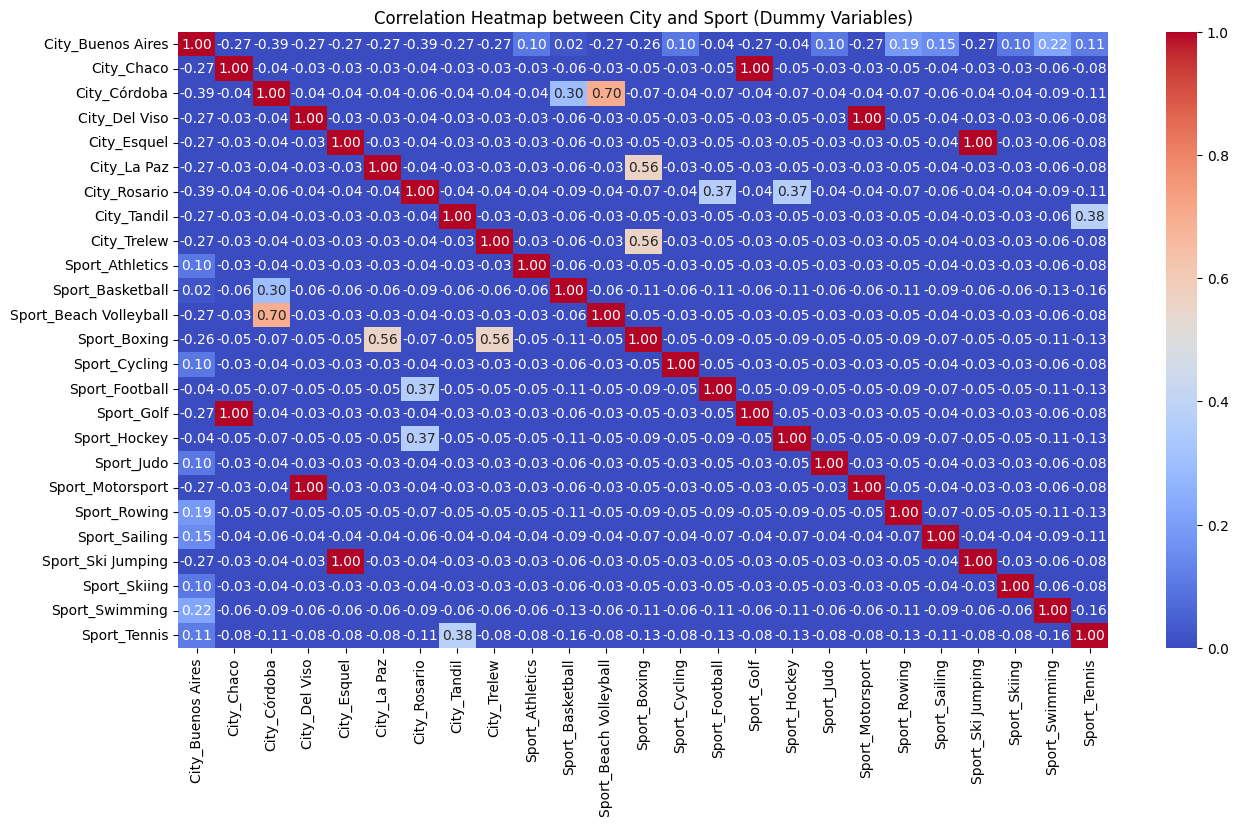

In [44]:
corr_matrix = city_sport_dummies.corr()

# Plot heatmap of the correlation matrix

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
plt.title('Correlation Heatmap between City and Sport (Dummy Variables)')
plt.show()

In [45]:
women_dummies = pd.get_dummies(women[['City', 'Sport']])

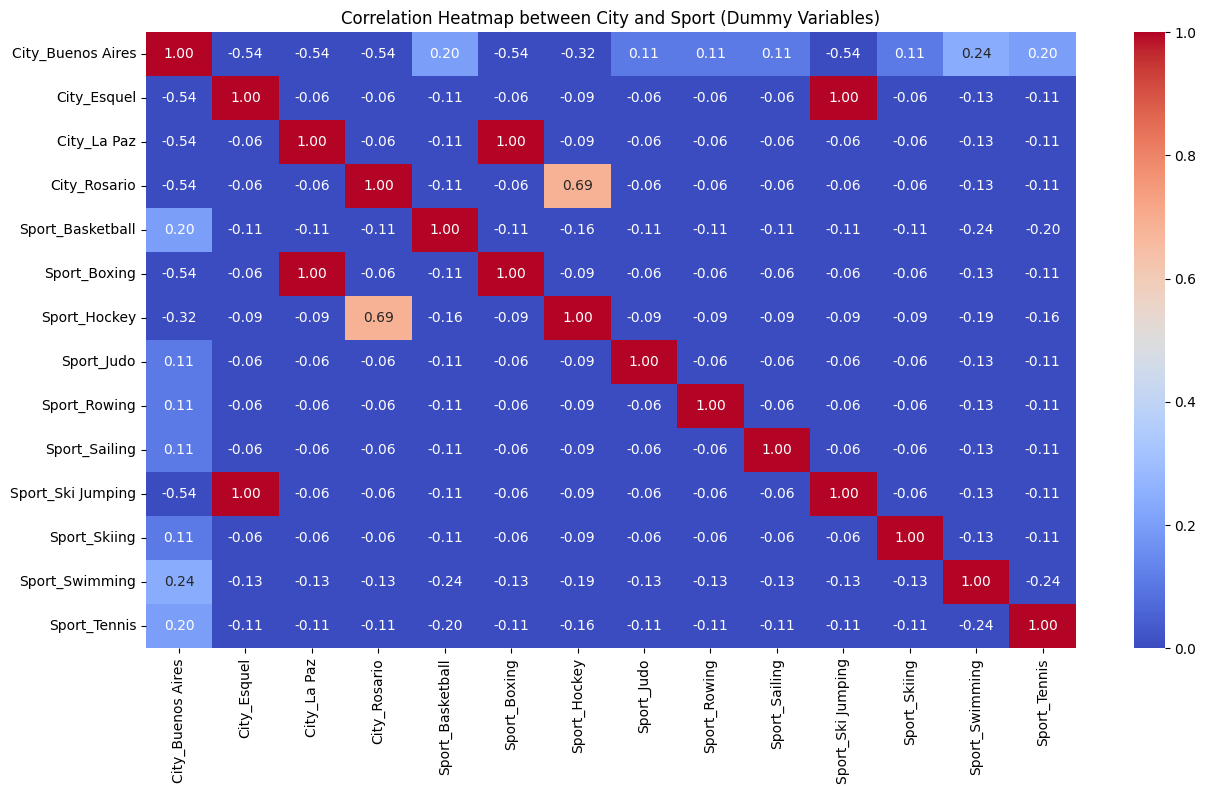

In [46]:
corr_matrix = women_dummies.corr()

# Plot heatmap of the correlation matrix

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
plt.title('Correlation Heatmap between City and Sport (Dummy Variables)')
plt.show()

In [63]:
!pip install --upgrade google-auth google-auth-oauthlib google-auth-httplib2
!pip install --upgrade gspread
!pip install pandas gspread oauth2client
import gspread
from oauth2client.client import GoogleCredentials
from google.colab import auth
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# Authenticate with Google Colab
auth.authenticate_user()

# Define the scope for accessing Google Sheets
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']

# Load the JSON file containing the service account credentials
credentials = ServiceAccountCredentials.from_json_keyfile_name('/content/sample_data/colabtosheets-976e8d2830cf.json', scope)

# Authorize access to Google Sheets
gc = gspread.authorize(credentials)

from oauth2client.service_account import ServiceAccountCredentials

scope = [
    'https://www.googleapis.com/auth/spreadsheets',  # Google Sheets API scope
    'https://www.googleapis.com/auth/drive'          # Google Drive API scope
]

credentials = ServiceAccountCredentials.from_json_keyfile_name('/secret.json', scope)

spreadsheet_id = 'secred_id'
spreadsheet = gc.open_by_key(spreadsheet_id)

worksheets = spreadsheet.worksheets()
for worksheet in worksheets:
    print(worksheet.title)

worksheet_name = 'Лист1'


data = df.values.tolist()


worksheet = spreadsheet.worksheet(worksheet_name)

worksheet.clear()

worksheet.append_rows(data)
worksheet = spreadsheet.worksheet("Лист1")
all_values = worksheet.get_all_values()


worksheet.update(all_values)

worksheet = spreadsheet.worksheet("Лист1")

  Using cached gspread-6.0.2-py3-none-any.whl (53 kB)
  Using cached StrEnum-0.4.15-py3-none-any.whl (8.9 kB)
  Attempting uninstall: gspread
    Found existing installation: gspread 3.4.2
    Uninstalling gspread-3.4.2:
      Successfully uninstalled gspread-3.4.2
